In [53]:
%pip install seaborn
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [54]:
%pip install pillow
%pip install scikit-learn
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [55]:
import os
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
%matplotlib inline 
# Define the path to the main directory containing subdirectories for each class
data_directory = 'dataset/'

In [56]:
# Specify the image dimensions and batch size
img_width, img_height = 128, 128
batch_size = 32
imagesize = img_width
CLASSES = ['cancer', 'chickenpox', "cowpox", "healthy", "measles", "monkeypox"]

# Use ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    validation_split=0.4,  # Adjust the validation split ratio as needed
)

In [57]:
# Create separate generators for training and validation sets
train_generator = datagen.flow_from_directory(
    "dataset/train",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    classes=CLASSES,
    subset='training'  # Specify 'training' for the training set
)

validation_generator = datagen.flow_from_directory(
    "dataset/val",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    classes=CLASSES,
    subset='validation'  # Specify 'validation' for the validation set
)

Found 2612 images belonging to 6 classes.
Found 191 images belonging to 6 classes.


In [58]:
# Build a simple CNN model
from keras.optimizers import SGD, Adam

# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu', padding="same", kernel_regularizer=l2(0.1)))
# # model.add(Conv2D(32, (3, 3)))
# # model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dropout(0.5))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(3, activation='softmax'))  # Assuming you have 3 classes

# Creating the model
# model = Sequential()
# model.add(Conv2D(32, (3,3), 1, activation='relu', 
#         input_shape=(img_width, img_height, 3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(64, (3,3), 1, activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Flatten())
# model.add(Dense(1280, activation='relu'))
# model.add(Dense(1280, activation='relu'))
# # model.add(Dropout(0.5))
# model.add(Dense(6, activation='softmax'))

# model = Sequential()
# model.add(Conv2D(32, kernel_size=3, input_shape=(img_width, img_height, 3), activation='relu', padding='same')
# )
# model.add(MaxPool2D(pool_size=2))
# # model.add(Dropout(0.25))
# model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
# model.add(MaxPool2D(pool_size=2))
# # model.add(Dropout(0.25))
# model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
# model.add(MaxPool2D(pool_size=2))
# # model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# # model.add(Dropout(0.5))
# model.add(Dense(6, activation='softmax'))

model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(6, activation='softmax'))


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

/Users/daryl/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,288,454 (16.36 MB)

 Trainable params: 4,288,454 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
# checkpoint = ModelCheckpoint("vgg16_1.keras", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

history = model.fit(
    train_generator,
    # steps_per_epoch=train_generator.samples // batch_size,
    epochs=15,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    # validation_steps=validation_generator.samples // batch_size
)

Epoch 1/15


/Users/daryl/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 37s 436ms/step - accuracy: 0.2553 - loss: 1.6170 - val_accuracy: 0.2408 - val_loss: 1.5619
Epoch 2/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 42s 503ms/step - accuracy: 0.4184 - loss: 1.4192 - val_accuracy: 0.3194 - val_loss: 1.5065
Epoch 3/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 41s 496ms/step - accuracy: 0.4699 - loss: 1.2879 - val_accuracy: 0.3246 - val_loss: 1.4478
Epoch 4/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 42s 503ms/step - accuracy: 0.5368 - loss: 1.1630 - val_accuracy: 0.3613 - val_loss: 1.4660
Epoch 5/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 41s 490ms/step - accuracy: 0.6125 - loss: 1.0384 - val_accuracy: 0.4031 - val_loss: 1.4730
Epoch 6/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 50s 602ms/step - accuracy: 0.6202 - loss: 0.9690 - val_accuracy: 0.4188 - val_loss: 1.4029
Epoch 7/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 42s 504ms/step - accuracy: 0.6493 - loss: 0.9005 - val_accuracy: 0.4136 - val_loss: 1.5070
Epoch 8/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 41s 494ms/step - accuracy: 0.7193 - loss: 0.7801 - val_accuracy: 0.424

In [61]:
# Evaluate the model on the test set (you should have a separate test set)
test_generator = datagen.flow_from_directory(
    "dataset/test",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    classes=CLASSES,
    subset='validation'
)

Found 192 images belonging to 6 classes.


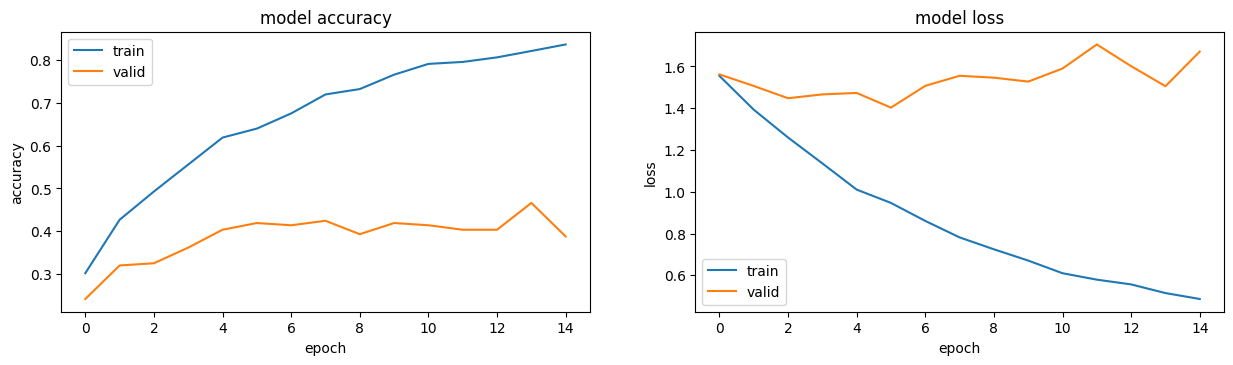

In [62]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [63]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

testingData = ImageDataGenerator(rescale=1.0/255.0)

testdata = testingData.flow_from_directory(
    'dataset/test',
    target_size=(imagesize, imagesize),  # Change this to the input size of your model
    class_mode='categorical',  # or 'binary' depending on your model
    shuffle=False,
    classes= CLASSES
)

# Make predictions on the test set
test_loss, test_accuracy = model.evaluate(testdata)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

y_true = testdata.classes
y_pred_probs = model.predict(testdata, steps = None)

print("testdata.samples:", testdata.samples)
print("len(y_true):", len(y_true))

y_pred = np.argmax(y_pred_probs, axis=1)
print("y_pred: ", len(y_pred));

# # Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate precision
precision = precision_score(y_true, y_pred, average='weighted')

# Calculate sensitivity (recall)
sensitivity = recall_score(y_true, y_pred, average='weighted')

# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)

Found 482 images belonging to 6 classes.
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.5011 - loss: 1.4407
Test Loss: 1.2193880081176758
Test Accuracy: 0.6037344336509705
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
testdata.samples: 482
len(y_true): 482
y_pred:  482
Confusion Matrix:
[[46  1 15  4 34]
 [ 9 55  4  9 22]
 [ 4  5 69 12 10]
 [18  0  5 49 11]
 [ 9  2 13  4 72]]
Accuracy: 0.6037344398340249
Precision: 0.6337644324403912
Sensitivity (Recall): 0.6037344398340249


In [64]:
model_type = "CNN"
variant = "VARA"
count = "016a"
epochs = 15

In [65]:
model.save('cnnmodel.keras')

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your pre-trained model
model = tf.keras.models.load_model("../models/a/RSNT50-VARA08a-128x128-EP7-ACCU88-09-06-2024.keras")

# Create the test data generator
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Specify the path to your test set
test_generator = test_datagen.flow_from_directory(
    'data/test',
    target_size=(128, 128),  # Change this to the input size of your model
    class_mode='categorical',  # or 'binary' depending on your model
    shuffle=False,
    classes= CLASSES
)

# Evaluate the model using the generator
loss, accuracy = model.evaluate(test_generator, verbose=1)
print(f"Accuracy: {accuracy}")

# Get predictions
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix")
print(cm)

# Calculate additional metrics
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
error_rate = 1 - accuracy

print(f"Precision: {precision}")
print(f"Sensitivity (Recall): {recall}")
print(f"Error Rate: {error_rate}")

# Classification Report
print("Classification Report")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Found 3647 images belonging to 3 classes.


/Users/ame/.pyenv/versions/3.9.6/lib/python3.9/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 430 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None, 3), output.shape=(None, 3)

Confusion Matrix
[[497, 181, 40], [7, 1553, 226], [0, 5, 1138]]


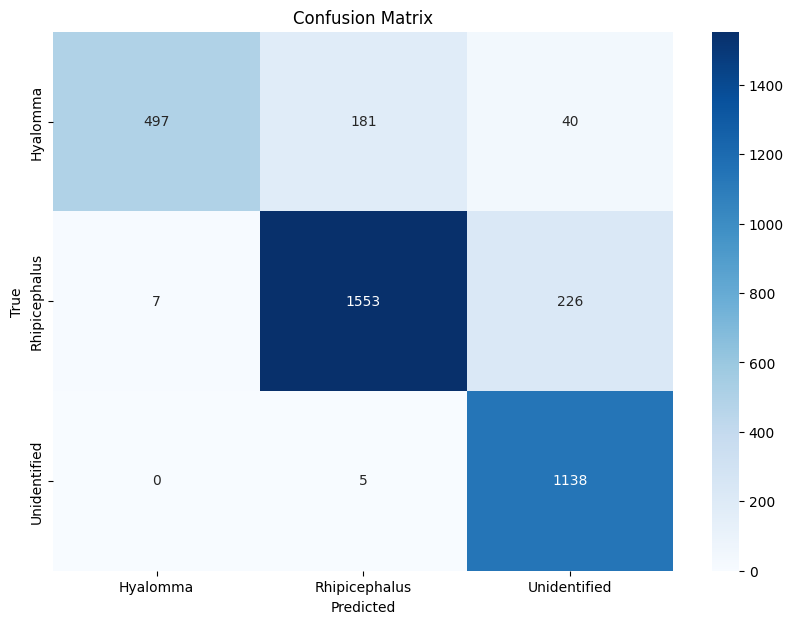

In [63]:
# Confusion Matrix
cm = [[497, 181, 40],[7, 1553, 226],[0, 5, 1138]]
print("Confusion Matrix")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
